In [58]:
#Import the necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle
import pandas as  pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')

In [60]:
print(train.head(2))
print(test.head(2))
print(sample.head(2))

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   

   target  
0       1  
1       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
   id  target
0   0       0
1   2       0


In [61]:
#Set the seed value
SEED = 4243

In [62]:
#Define the label
TARGET = "target"

In [63]:
def plot_null_values(df):
    print("Total number of samples in the data =",df.shape[0])
    sns.heatmap(df.isnull().sum().to_frame(),
                annot=True,
                fmt="d",
                cmap="crest"
                )
    plt.title("Heatmap of NULL values")

				NULL values in Train Dataset
Total number of samples in the data = 7613


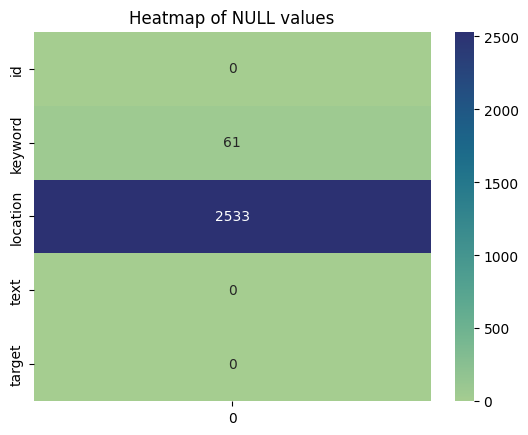

In [64]:
#Use the plot_null_values function to plot Null values in the train dataset
print("\t\t\t\tNULL values in Train Dataset")
plot_null_values(train)

In [65]:
#Replace the Null values with str(0)
train.fillna("0",inplace=True)
test.fillna("0",inplace=True)

Text(0.5, 1.0, 'Distribution of target values')

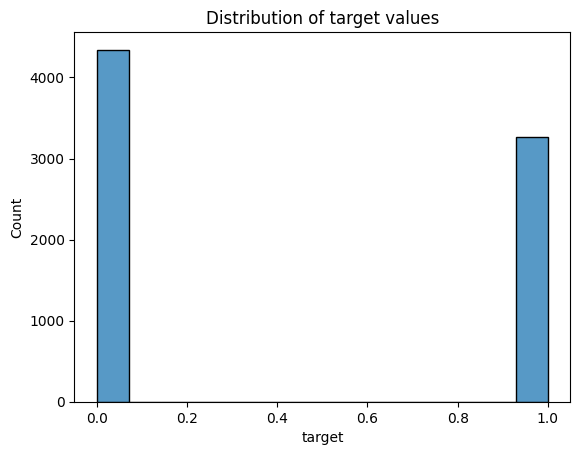

In [66]:
#Target analysis
sns.histplot(x=train[TARGET])
plt.title("Distribution of target values")

In [67]:
#Group the train DataFrame by "keyword" column and
# count the "target" Series group values
keyword = train.groupby("keyword")["target"].count()

#Convert the above Groupby Object to DataFrame and sort the values
keyword_df = pd.DataFrame(data={"keyword":keyword.index, "count":keyword.values}).sort_values(by=["count"],ascending=False)
keyword_df

,keyword,count
0,0,61
105,fatalities,45
64,deluge,42
9,armageddon,42
178,sinking,41
...,...,...
116,forest%20fire,19
95,epicentre,12
195,threat,11
135,inundation,10


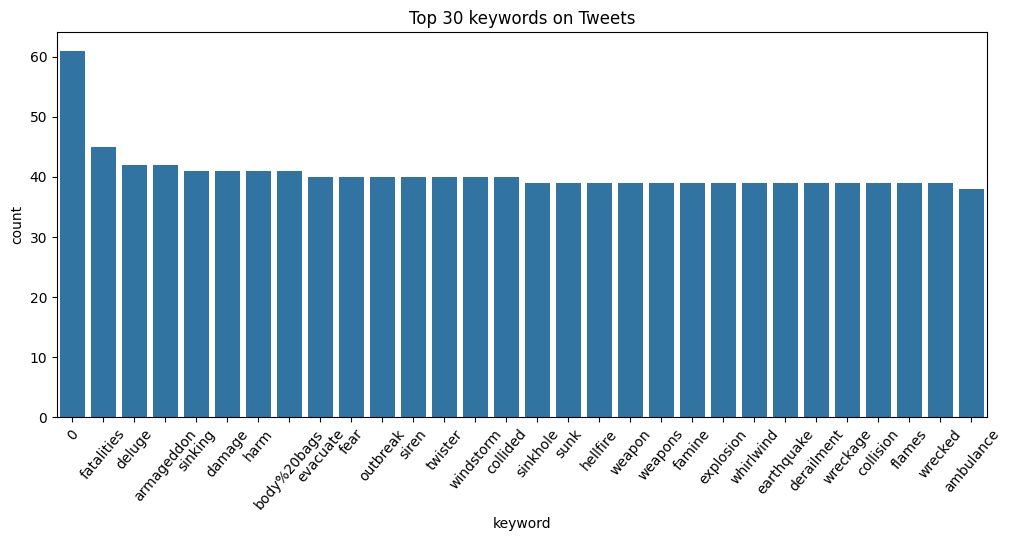

In [68]:
#Let's plot the "key" DataFrame
plt.figure(figsize=(12,5))
#Limit the data to top 30 keywords by .head() method
sns.barplot(data=keyword_df.head(30), x = 'keyword',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 keywords on Tweets');

In [69]:
#Group the train DataFrame by "keyword" column and
# count the "target" Series group values
location = train.groupby("location")["target"].count()

#Convert the above Groupby Object to DataFrame and sort the values
location_df = pd.DataFrame(data={"location":location.index, "count":location.values}).sort_values(by=["count"],ascending=False)
location_df

,location,count
80,0,2533
2644,USA,104
1827,New York,71
2663,United States,50
1507,London,45
...,...,...
1199,Hueco Mundo,1
1200,"Hughes, AR",1
1201,"Huntington, WV",1
1202,"Huntley, IL",1


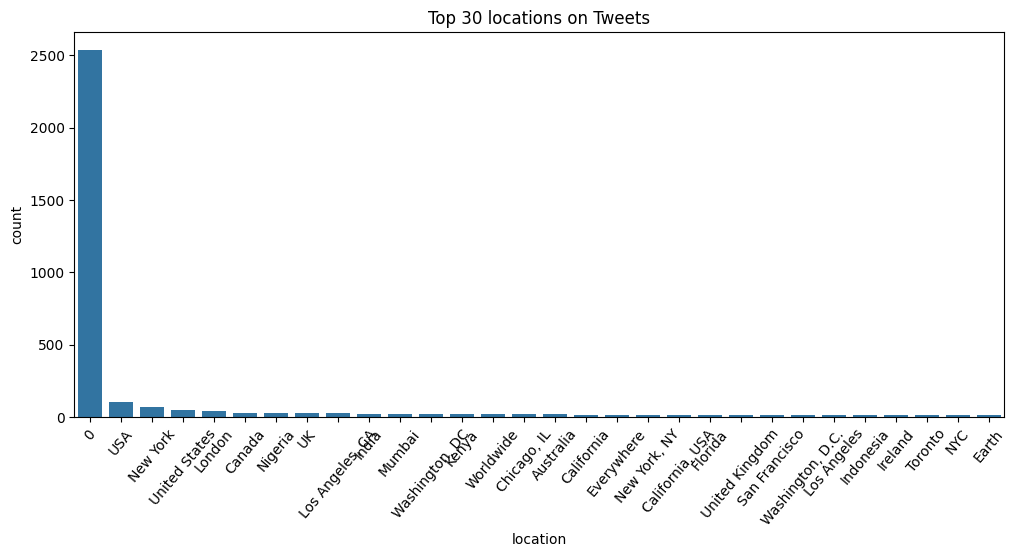

In [70]:
#Let's plot the "location" DataFrame
plt.figure(figsize=(12,5))

#Limit the data to top 30 locations by .head() method
sns.barplot(data=location_df.head(30), x = 'location',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 locations on Tweets');

Text(0.5, 1.0, 'Top 30 locations on Tweets')

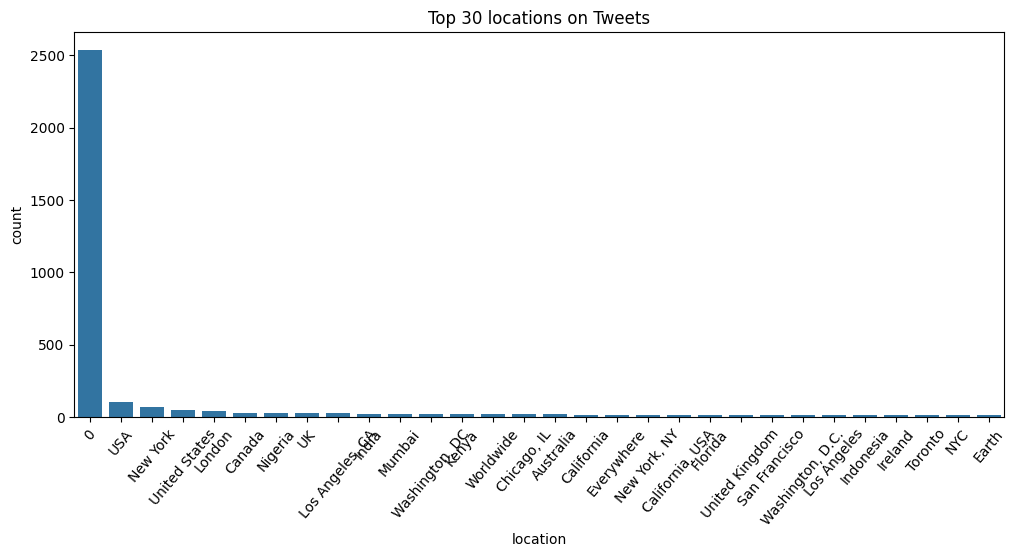

In [71]:
#Let's plot the "location" DataFrame
plt.figure(figsize=(12,5))

#Limit the data to top 30 locations by .head() method
sns.barplot(data=location_df.head(30), x = 'location',y = 'count')
plt.xticks(rotation = 50)
plt.ylabel('count')
plt.title('Top 30 locations on Tweets')

In [72]:
#Define a function to get the maximum length of words in each column
def check_max_length_sentence(df):
    max_length = 0
    for text in df["text"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Text column is:",max_length)
    
    max_length = 0
    for text in df["location"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Location column is:",max_length)
    
    max_length = 0
    for text in df["keyword"]:
        if len(text) > max_length:
            max_length = len(text)
    print("Maximum length of Keyword column is:",max_length)

In [73]:
#Maximum lengths of columns in train data
check_max_length_sentence(train)

Maximum length of Text column is: 157
Maximum length of Location column is: 49
Maximum length of Keyword column is: 21


In [74]:
#Maximum lengths of columns in test data
check_max_length_sentence(test)

Maximum length of Text column is: 151
Maximum length of Location column is: 42
Maximum length of Keyword column is: 21


In [75]:
def get_sentence_lengths(df):
    df2 = pd.DataFrame(columns=["length"])
    i = 0
    for text in df["text"]:
        df2.loc[i,"length"] = len(text)
        i+=1
    return df2

def plot_sentence_lengths(df):
    lengths_df = get_sentence_lengths(df)
    bins = range(0,161,20)
    plt.hist(lengths_df["length"], bins=bins,alpha=0.3)
    #sns.countplot(data=lengths_df, x="length")
    plt.title("Distribution of sentence lengths")

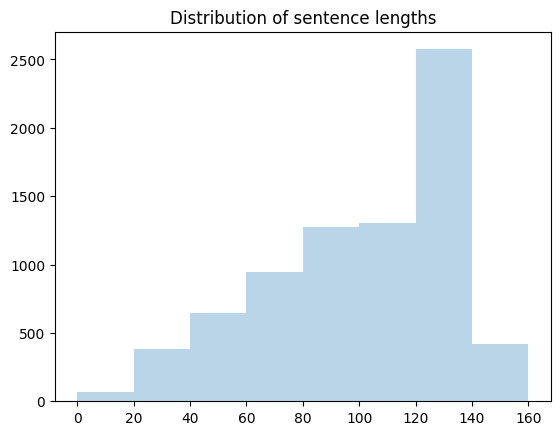

In [76]:
#Use the plot_sentence_lengths function on train dataset
plot_sentence_lengths(train)

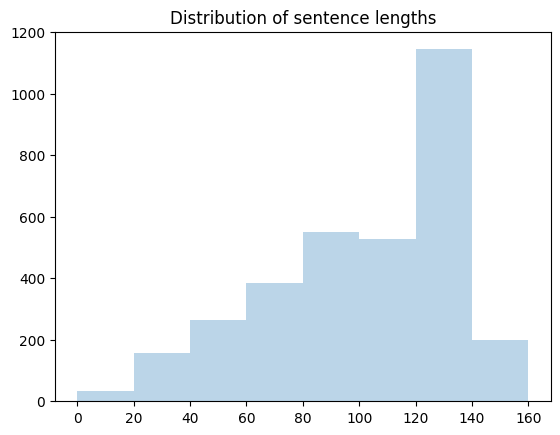

In [77]:
#Use the plot_sentence_lengths function on test dataset
plot_sentence_lengths(test)

In [78]:
#Remove the "id" column form the train DataFrame
train.pop("id")

0           1
1           4
2           5
3           6
4           7
        ...  
7608    10869
7609    10870
7610    10871
7611    10872
7612    10873
Name: id, Length: 7613, dtype: int64

In [79]:
train.head(3)

,keyword,location,text,target
0,0,0,Our Deeds are the Reason of this #earthquake M...,1
1,0,0,Forest fire near La Ronge Sask. Canada,1
2,0,0,All residents asked to 'shelter in place' are ...,1


In [80]:
test.head(2)

,id,keyword,location,text
0,0,0,0,Just happened a terrible car crash
1,2,0,0,"Heard about #earthquake is different cities, s..."


In [81]:
train.drop(['keyword','location'],axis=1,inplace=True)
test.drop(['location','keyword'],axis=1,inplace=True)

In [82]:
#Shuffle the DataFrame
train = shuffle(train, random_state=SEED)
train = shuffle(train, random_state=int(SEED/2))
train.head()

,text,target
2342,#download &amp; #watch Demolition Frog (2002) ...,1
6001,@heyot6 Im not home. I need to watch. [Screams],0
6876,Back in Ireland v. sad/traumatised as is freez...,0
7397,Texas Seeks Comment on Rules for Changes to Wi...,0
1683,The Witches of the Glass Castle. Supernatural ...,0


In [83]:
#Convert train data to tf.data.Dataset object
BATCH = 32
#Concatenate the text data of the columns "keyword", "location", "text"
train_tf = tf.data.Dataset.from_tensor_slices(
    (train['text'], train[TARGET]))

#Convert the data into batch
train_tf = train_tf.shuffle(int((SEED*13)/8)).batch(BATCH)

#Convert test data to tf.data.Dataset object
test_tf = tf.data.Dataset.from_tensor_slices(test['text'])

#Convert the data into batch
test_tf = test_tf.batch(BATCH)

In [84]:
max_length = 165
max_tokens = 20_000

#Instantiate the TextVectorization layer
text_vectorization = layers.TextVectorization(max_tokens=max_tokens,
                                              output_mode='int',
                                              output_sequence_length=max_length
                                             )

In [85]:
#Learn the vocabulary
text_vectorization.adapt(train_tf.map(lambda twt, target: twt))

In [86]:
#Get the vocabulary
vocab = text_vectorization.get_vocabulary()
print("Vocabulary size =",len(vocab))

#Convert the list object to NumPy array for decoding the vectorized data
vocab = np.array(vocab)

Vocabulary size = 20000


In [88]:
#Vectorize the train dataset
train_tf = train_tf.map(lambda twt, target: (text_vectorization(twt), target),
                   num_parallel_calls=tf.data.AUTOTUNE)

#Vectorize the test dataset
test_tf = test_tf.map(lambda twt: text_vectorization(twt),
                      num_parallel_calls=tf.data.AUTOTUNE)

In [89]:
#Define a function to print the tokenized data
def print_sample(data_obj):
    for sample, traget in data_obj:
        #Print the first item
        print("1st sample:",sample[0].numpy())
        print("\n")
        #Print the second item
        print("2nd sample:",sample[1].numpy())
        print("\n")
        #Print the third item
        print("3rd sample:",sample[2].numpy())
        print("\n")
        break

In [90]:
#Print the tokenized data
print_sample(train_tf)

1st sample: [12349 18963    65   208  7559     7  2270    23   130    10    12   231
   278    63    41   293    54   345     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0   

In [91]:
#Print the vectorized tweet and the decoded tweet
for tx in train_tf:
    print("\t\t\t\tVectorized Tweet:\n",tx[0][0])
    print("\n\n\t\t\t\tDecoded Tweet:\n", " ".join(vocab[tx[0][0].numpy()]))
    break

				Vectorized Tweet:
 tf.Tensor(
[ 1500     1  3747   352  3527  2173   574   776   285    30     9    15
   143  1513     5   990     3 14823     1  3747  1017     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     

In [92]:
class TransformerEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, num_heads, **kwargs):
        super().__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.num_heads = num_heads
        
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.dense_prof = keras.Sequential(
            [layers.Dense(dense_dim, activation='relu'),
             layers.Dense(embed_dim),]
                                )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()
        self.max_pool1 = layers.GlobalMaxPooling1D()
        
    # Define all methods where forward pass is implement
    
    def call(self, inputs, mask = None):
        if mask is not None:
            mask = mask[:, tf.newaxis, :]
            
        # Apply the attention layers
        attention_output = self.attention(inputs, inputs, attention_mask = mask)
        #Normalizaion the data
        proj_input = self.layernorm_1(inputs + attention_output)
        #Apply Dense Layer
        proj_output= self.dense_prof(proj_input)
        #Normalization the data and return it
        return self.layernorm_2(proj_input + proj_output)
    
    #Define configuration methods
    def get_config(self):
        config = super().get_config()
        config_update({
            'embed_dim' : self.embed_dim,
            'num_heads' : self.num_heads,
            'dense_dim': self.dense_dim
        })
        
        return config

In [93]:
# Implement Positional embedding as a subclass layers
class PositionalEmbedding(layers.Layer):
    def __init__(self, sequence_length, input_dim, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.sequence_legth = sequence_length
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.token_embeddings = layers.Embedding(
            input_dim = input_dim, output_dim = output_dim)
        self.positional_embeddings = layers.Embedding(
            input_dim=sequence_length, output_dim=output_dim)
        
    def call(self, inputs):
        length = tf.shape(inputs)[-1]
        positions = tf.range(start = 0, limit=length,delta  =1)
        embedded_tokens = self.token_embeddings(inputs)
        embedded_positions = self.positional_embeddings(positions)
        return embedded_tokens + embedded_positions
    
    def compute_mask(self, inputs, mask = None):
        return tf.math.not_equal(inputs , 0)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'output_dim' : self.output_dim,
            'sequence_lenght': self.sequence_legth,
            'input_dim': self.input_dim
        })
        return config
    

In [94]:
# Constract the model
# Define the input
inputs = keras.Input(shape=(None,), dtype='int64')

# apply positional embeddings
pos_embed = PositionalEmbedding(sequence_length=165,
                               input_dim=20_000,
                                output_dim=256)(inputs)

# apply the encoder
encoder = TransformerEncoder(embed_dim=256,
                            dense_dim=32,
                            num_heads =8)(pos_embed)
x = layers.GlobalMaxPooling1D()(encoder)
x = layers.Dropout(0.5)(x)
output = layers.Dense(units=1, activation='sigmoid')(x)
model = keras.Model(inputs= inputs, outputs = output)

In [95]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5, beta_1=0.9, beta_2=0.98,epsilon=1e-9),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
             )

In [96]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 positional_embedding_1 (Po  (None, None, 256)         5162240   
 sitionalEmbedding)                                              
                                                                 
 transformer_encoder_1 (Tra  (None, None, 256)         2121248   
 nsformerEncoder)                                                
                                                                 
 global_max_pooling1d_3 (Gl  (None, 256)               0         
 obalMaxPooling1D)                                               
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                           

In [97]:
# plot model
keras.utils.plot_model(model=model,
                      to_file='model.png',
                      show_shapes = True,
                      show_layer_names=True,
                      expand_nested=True,
                      show_layer_activations=True,
                      show_trainable=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [98]:
# Define validation Data
val_size = int(0.25 * len(train_tf))

In [99]:
# Split the dta into training and validation
validation_data = train_tf.take(val_size)
train_data = train_tf.skip(val_size)

In [100]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_gru = EarlyStopping(monitor='val_loss', patience=3)


history = model.fit(train_data,
                    epochs=30,
                    validation_data=validation_data,
                    callbacks=early_stopping_gru
                    )


Epoch 1/30
 28/179 [===>..........................] - ETA: 2:02 - loss: 1.3002 - accuracy: 0.5056

KeyboardInterrupt: 

In [ ]:
model.evaluate(validation_data)

59/59 [==============================] - 15s 247ms/step - loss: 0.2276 - accuracy: 0.9153


[0.22760121524333954, 0.9152542352676392]

<_TakeDataset element_spec=(TensorSpec(shape=(None, 165), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Training and Validation loss')

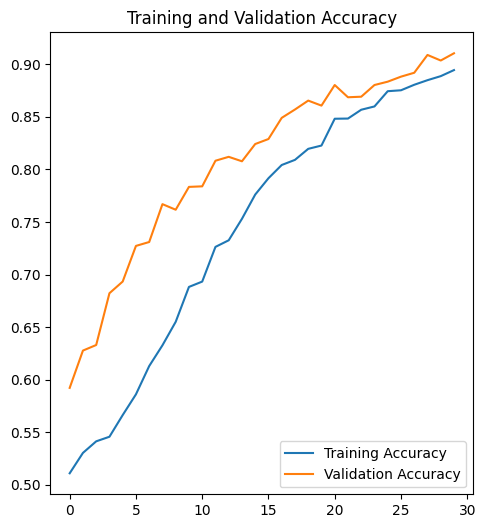

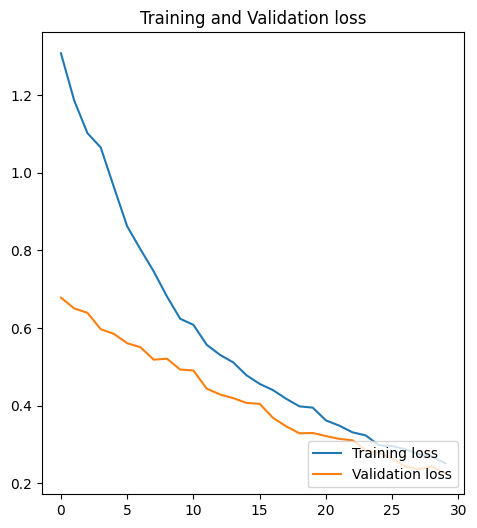

In [ ]:
Epochs = len(acc)
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(Epochs),acc, label='Training Accuracy')
plt.plot(range(Epochs),val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(range(Epochs),loss, label='Training loss')
plt.plot(range(Epochs),val_loss, label='Validation loss')
plt.legend(loc='lower right')
plt.title('Training and Validation loss')

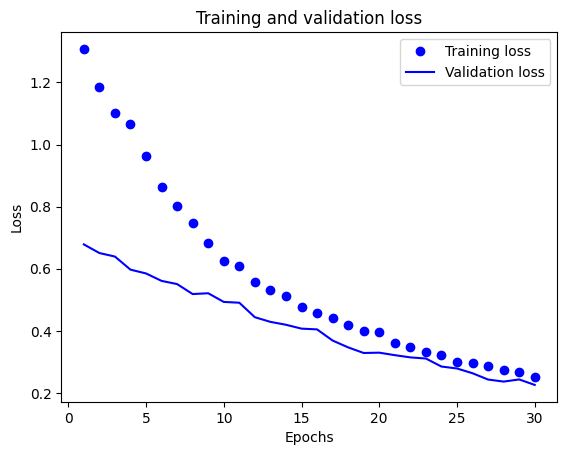

In [ ]:
# Plotting the training and validation loss
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

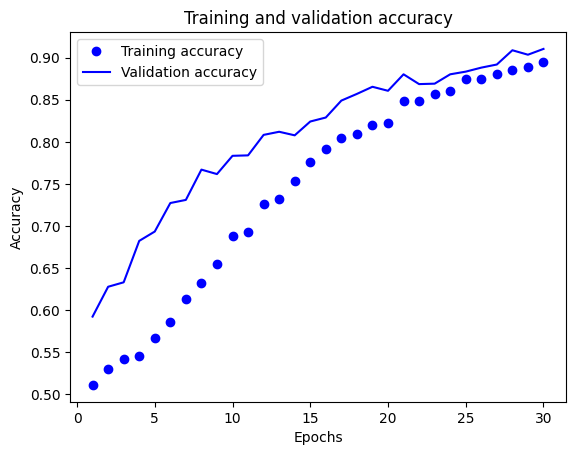

In [ ]:
# Plotting the training and validation accuracy
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [ ]:
prdictions = model.predict(test_tf)

102/102 [==============================] - 26s 246ms/step


In [ ]:
test_tf

<_ParallelMapDataset element_spec=TensorSpec(shape=(None, 165), dtype=tf.int64, name=None)>

In [ ]:
validation_data

<_TakeDataset element_spec=(TensorSpec(shape=(None, 165), dtype=tf.int64, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
thresholds = 0.5 
# convert the float values to binary
final_predictions = [1 if i > thresholds else 0 for i in prdictions]
final_predictions[:10]

[1, 1, 1, 0, 1, 1, 0, 0, 0, 0]

In [ ]:
sample

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0
...,...,...
3258,10861,0
3259,10865,0
3260,10868,0
3261,10874,0


In [ ]:
submisssion = pd.DataFrame(columns=['id','target'])
submisssion['target'] = final_predictions
submisssion['id'] = test.id
submisssion

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
submisssion

,id,target
0,0,1
1,2,1
2,3,1
3,9,0
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [ ]:
import pickle
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 

NameError: name 'config_update' is not defined

EOFError: Ran out of input